In [80]:
import pandas as pd
import sns as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('./yelp_vegas.csv')

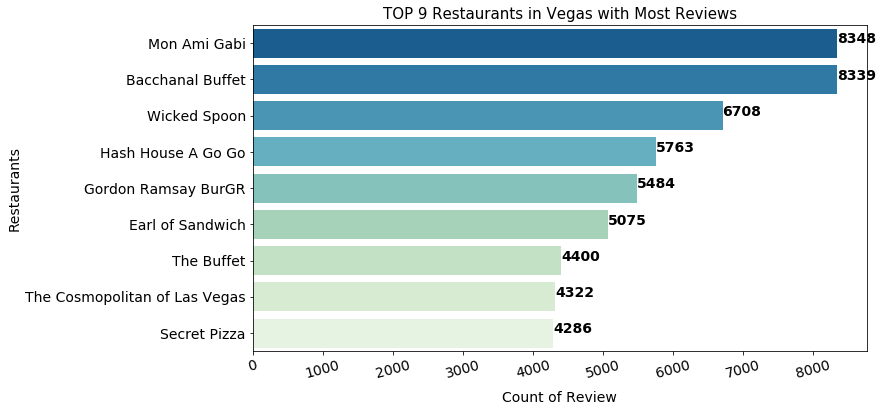

In [89]:
plt.figure(figsize=(11,6))
grouped = df[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants in Vegas with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

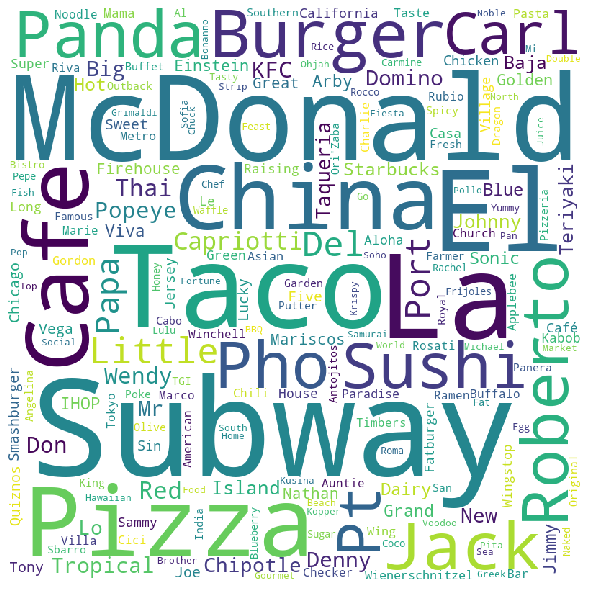

In [73]:

color = sns.color_palette()
restaurant_tokens = df['name'].str.split()
restaurant_text = ' '.join(word[0] for word in restaurant_tokens.values)
wordcloud = WordCloud(width=800, height=800, background_color='white') \
    .generate(restaurant_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


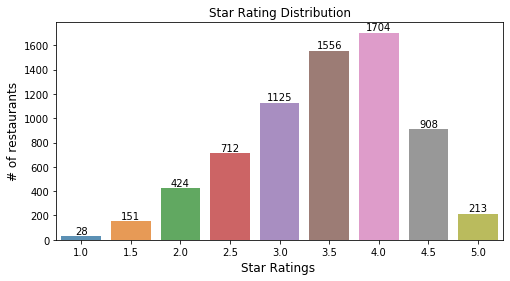

In [90]:
# Number of business vs star rating
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of restaurants', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

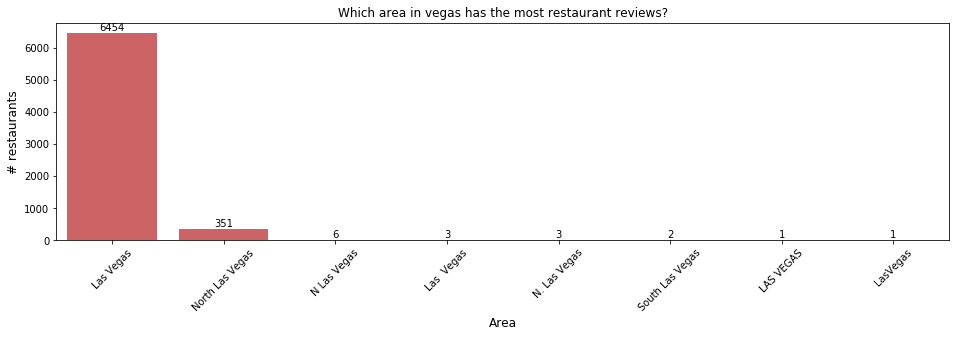

In [91]:
#Get the distribution of the ratings
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which area in vegas has the most restaurant reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Area', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


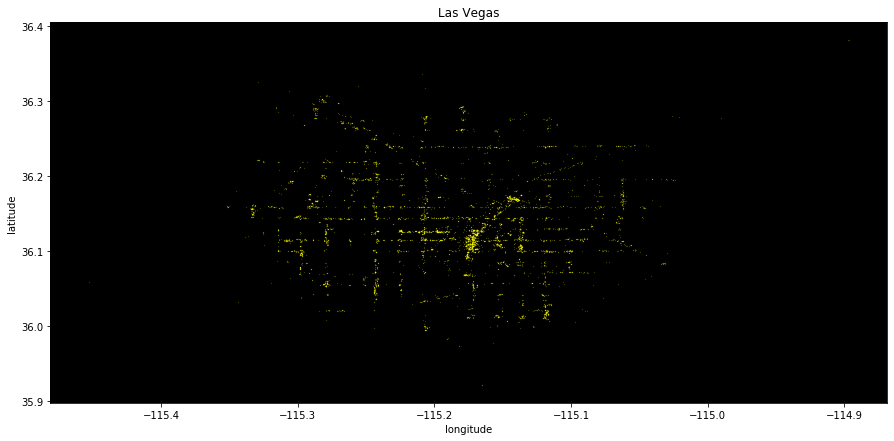

In [92]:
#areas of vegas where reviews are available
rating_data=df[['latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

f, (ax1) = plt.subplots(1, 1, figsize=(15,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')
f.show()

In [94]:
# map section
import folium
import folium.plugins as plugins

data=[]
#rearranging data to suit the format needed for folium
stars_list=list(rating_data['stars'].unique())
for star in stars_list:
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
#initialize at vegas
lat = 36.127430
lon = -115.138460
zoom_start=11
print("Vegas Review heatmap Animation ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
hm.add_to(m)
m

Vegas Review heatmap Animation 
